## Logistic Regression Based Classifier

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [20]:
df = pd.read_csv("D:/PROJECTS/Version Control/ExpenX/data/final_cleaned_expenses.csv")
X = df['description_clean']
y = df['category']

In [21]:
print("Total Records:", len(df))
print("Null Values:\n", df.isnull().sum())
print("Unique Categories:", df['category'].nunique())
print("Categories:\n", df['category'].value_counts())

Total Records: 1560
Null Values:
 description          0
category             0
description_clean    0
dtype: int64
Unique Categories: 10
Categories:
 category
Entertainment       560
Food                149
Utility             111
Insurance           111
Maintenance         111
Payroll             106
Health & Fitness    104
Benefits            103
Rent                103
Subscription        102
Name: count, dtype: int64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


                  precision    recall  f1-score   support

        Benefits       1.00      1.00      1.00        21
   Entertainment       0.99      1.00      1.00       103
            Food       0.96      1.00      0.98        27
Health & Fitness       1.00      0.95      0.98        21
       Insurance       1.00      1.00      1.00        32
     Maintenance       1.00      0.95      0.98        22
         Payroll       1.00      1.00      1.00        25
            Rent       0.96      1.00      0.98        22
    Subscription       1.00      0.96      0.98        23
         Utility       1.00      1.00      1.00        16

        accuracy                           0.99       312
       macro avg       0.99      0.99      0.99       312
    weighted avg       0.99      0.99      0.99       312



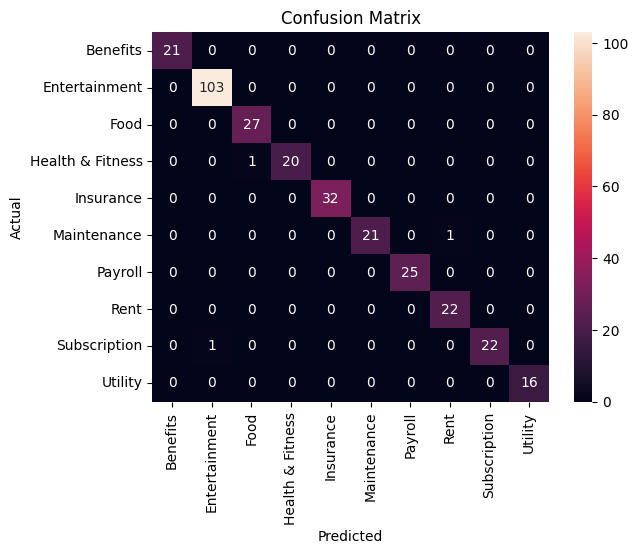

In [25]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
import joblib
joblib.dump(model, "D:/PROJECTS/Version Control/ExpenX/models/expense_classifier.pkl")
joblib.dump(tfidf, "D:/PROJECTS/Version Control/ExpenX/models/tfidf_vectorizer.pkl")

['D:/PROJECTS/Version Control/ExpenX/models/tfidf_vectorizer.pkl']

In [39]:
manual_descriptions = [
    "Paid ACT broadband monthly bill",
    "Domino’s order for weekend party",
    "Sent money to dad",
    "Invested in NPS retirement scheme",
    "Cred EMI auto-debit",
    "Zomato lunch order",
    "Mediclaim yearly premium",
    "Netflix monthly plan",
    "Apartment repair charges",
    "Paid gym trainer in cash",
    "Paid PG rent to landlord"
]

test_df = pd.DataFrame(manual_descriptions, columns=["description"])


In [44]:
vectorizer = joblib.load("D:/PROJECTS/Version Control/ExpenX/models/tfidf_vectorizer.pkl")
model = joblib.load("D:/PROJECTS/Version Control/ExpenX/models/expense_classifier.pkl")

In [45]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = text.strip()
    return text

test_df['cleaned_description'] = test_df['description'].apply(preprocess_text)

In [46]:

X_test_manual = vectorizer.transform(test_df['cleaned_description'])

In [ ]:
manual_preds = model.predict(X_test_manual)

test_df['Predicted Category'] = manual_preds
print(test_df[['description', 'Predicted Category']])

                          description Predicted Category
0     Paid ACT broadband monthly bill            Utility
1    Domino’s order for weekend party      Entertainment
2                   Sent money to dad           Benefits
3   Invested in NPS retirement scheme           Benefits
4                 Cred EMI auto-debit               Food
5                  Zomato lunch order               Food
6            Mediclaim yearly premium          Insurance
7                Netflix monthly plan       Subscription
8            Apartment repair charges        Maintenance
9            Paid gym trainer in cash   Health & Fitness
10           Paid PG rent to landlord               Rent


## BERT-based Classifier

In [4]:
from sentence_transformers import SentenceTransformer

d:\PROJECTS\Version Control\ExpenX\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv('D:/PROJECTS/Version Control/ExpenX/data/final_cleaned_expenses.csv')

# Load BERT sentence encoder
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode descriptions using BERT
X = model.encode(df['description'].tolist(), show_progress_bar=True)
y = df['category']

Batches:   0%|          | 0/49 [00:00<?, ?it/s]d:\PROJECTS\Version Control\ExpenX\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 49/49 [00:03<00:00, 14.30it/s]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        Benefits       1.00      0.95      0.98        21
   Entertainment       0.98      0.99      0.99       112
            Food       0.94      1.00      0.97        30
Health & Fitness       1.00      1.00      1.00        21
       Insurance       1.00      1.00      1.00        22
     Maintenance       1.00      1.00      1.00        22
         Payroll       1.00      1.00      1.00        21
            Rent       1.00      1.00      1.00        21
    Subscription       1.00      0.90      0.95        20
         Utility       1.00      1.00      1.00        22

        accuracy                           0.99       312
       macro avg       0.99      0.98      0.99       312
    weighted avg       0.99      0.99      0.99       312



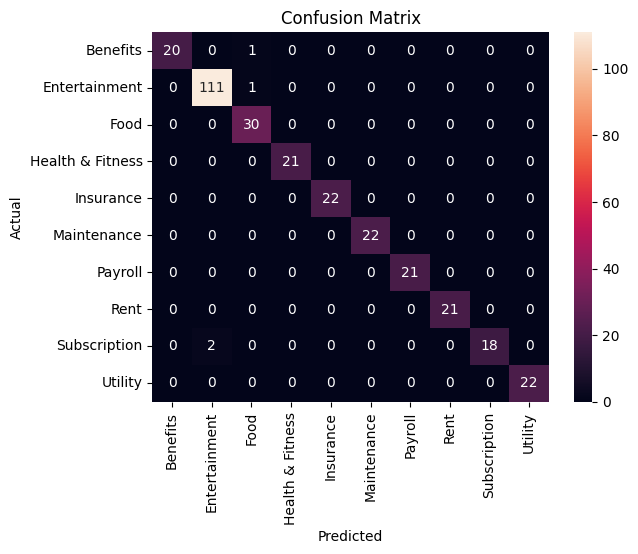

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
test_descriptions = [
    "Paid ACT broadband monthly bill",
    "Domino’s order for weekend party",
    "Sent money to dad",
    "Invested in NPS retirement scheme",
    "Cred EMI auto-debit",
    "Zomato lunch order",
    "Mediclaim yearly premium",
    "Netflix monthly plan",
    "Apartment repair charges",
    "Paid gym trainer in cash",
    "Paid PG rent to landlord"
]

test_vecs = model.encode(test_descriptions)
predicted_categories = clf.predict(test_vecs)

for desc, pred in zip(test_descriptions, predicted_categories):
    print(f"{desc} --> {pred}")

Paid ACT broadband monthly bill --> Utility
Domino’s order for weekend party --> Food
Sent money to dad --> Benefits
Invested in NPS retirement scheme --> Benefits
Cred EMI auto-debit --> Utility
Zomato lunch order --> Food
Mediclaim yearly premium --> Insurance
Netflix monthly plan --> Subscription
Apartment repair charges --> Maintenance
Paid gym trainer in cash --> Health & Fitness
Paid PG rent to landlord --> Rent


d:\PROJECTS\Version Control\ExpenX\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [16]:
import pickle

# Save the classifier
with open('D:/PROJECTS/Version Control/ExpenX/models/bert_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)


In [20]:
model.save('./bert_model')

In [22]:
from sentence_transformers import SentenceTransformer
import pickle

# Load local BERT model
model = SentenceTransformer('D:/PROJECTS/Version Control/ExpenX/models/bert_model')

# Load classifier
with open('D:/PROJECTS/Version Control/ExpenX/models/bert_classifier.pkl', 'rb') as f:
    clf = pickle.load(f)

# Example inputs
new_descriptions = [
    "Swiggy dinner for friends",
    "Paid Vodafone postpaid bill",
    "Monthly rent transfer",
    "Mediclaim premium paid",
    "Spotify monthly charge"
]

# Encode and predict
new_vecs = model.encode(new_descriptions)
predictions = clf.predict(new_vecs)

for desc, pred in zip(new_descriptions, predictions):
    print(f"{desc} --> {pred}")

Swiggy dinner for friends --> Food
Paid Vodafone postpaid bill --> Utility
Monthly rent transfer --> Rent
Mediclaim premium paid --> Insurance
Spotify monthly charge --> Subscription


d:\PROJECTS\Version Control\ExpenX\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


## Bert Based Classifier on New Data

In [1]:
from sentence_transformers import SentenceTransformer

d:\PROJECTS\Version Control\ExpenX\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("D:/PROJECTS/Version Control/ExpenX/data/new_expense_dataset.csv")

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')

X = model.encode(df['description'].tolist(), show_progress_bar=True)
y = df['category']

Batches:   0%|          | 0/92 [00:00<?, ?it/s]d:\PROJECTS\Version Control\ExpenX\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 92/92 [00:06<00:00, 14.79it/s]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

            Benefits       0.94      0.81      0.87        21
           EMI/Loans       1.00      1.00      1.00        26
           Education       0.80      0.64      0.71        25
       Entertainment       0.97      1.00      0.98       113
                Food       0.86      0.78      0.82        40
           Groceries       0.85      0.97      0.91        30
    Health & Fitness       0.91      0.97      0.94        31
           Insurance       0.88      1.00      0.94        23
Investment & Savings       1.00      0.93      0.96        29
         Maintenance       0.92      1.00      0.96        23
       Miscellaneous       0.71      0.78      0.74        45
             Payroll       0.96      1.00      0.98        22
       Personal Care       0.81      0.81      0.81        27
                Rent       0.91      1.00      0.95        21
            Shopping       0.75      0.62      0.68        29
       

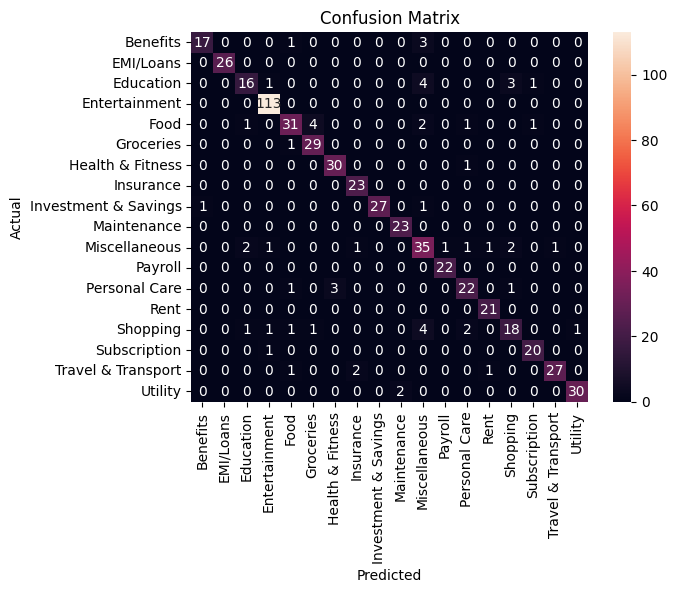

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
test_descriptions = [
    "Swiggy order: Chicken Biryani and Coke",
    "Electricity bill payment for July",
    "IRCTC train ticket to Pune",
    "Yoga class subscription renewal",
    "Bought grocery items from BigBasket",
    "Transferred ₹2000 to RD investment",
    "Amazon shopping for mobile accessories",
    "Haircut at Jawed Habib salon",
    "Paid EMI for bike loan",
    "College semester exam fees",
    "Life insurance premium - LIC",
    "AC servicing and apartment plumbing repair",
    "Salary credited from Infosys",
    "Monthly Netflix subscription auto-debited",
    "Sent ₹1000 to Mom for groceries",
    "Paid ₹7500 rent to PG owner",
    "Went to INOX for a movie and snacks",
    "Gave ₹300 cash to watchman as a Diwali gift",
    "Paid ₹500 for Udemy course on Python",
    "Recharged Jio Fiber broadband for next month",
    "Myntra order: Casual Shirt and Sneakers",
    "Gave ₹2000 to friend as loan repayment",
    "Bought veggies, fruits, and milk from local vendor",
    "Donated ₹100 to NGO via UPI",
    "Booked Ola to airport",
    "Bought dumbbells from Decathlon"
]

test_vecs = model.encode(test_descriptions)
predicted_categories = clf.predict(test_vecs)

for desc, pred in zip(test_descriptions, predicted_categories):
    print(f"{desc} --> {pred}")

Swiggy order: Chicken Biryani and Coke --> Food
Electricity bill payment for July --> Utility
IRCTC train ticket to Pune --> Travel & Transport
Yoga class subscription renewal --> Health & Fitness
Bought grocery items from BigBasket --> Food
Transferred ₹2000 to RD investment --> Investment & Savings
Amazon shopping for mobile accessories --> Shopping
Haircut at Jawed Habib salon --> Personal Care
Paid EMI for bike loan --> EMI/Loans
College semester exam fees --> Education
Life insurance premium - LIC --> Insurance
AC servicing and apartment plumbing repair --> Maintenance
Salary credited from Infosys --> Payroll
Monthly Netflix subscription auto-debited --> Subscription
Sent ₹1000 to Mom for groceries --> Food
Paid ₹7500 rent to PG owner --> Rent
Went to INOX for a movie and snacks --> Entertainment
Gave ₹300 cash to watchman as a Diwali gift --> Miscellaneous
Paid ₹500 for Udemy course on Python --> Education
Recharged Jio Fiber broadband for next month --> Utility
Myntra order: Cas

d:\PROJECTS\Version Control\ExpenX\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [9]:
import pickle

with open('D:/PROJECTS/Version Control/ExpenX/models/new_bert_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [10]:
model.save('D:/PROJECTS/Version Control/ExpenX/models/new_bert_model')